1.3 Create a Jupyter Notebook to read in the data. Add a markdown cell to explain the data and what are the inputs and output. Also answer whether this is a classification or regression problem.

The EEG data was collected from 10 college students who were attached to electrodes on the head. The students watched a 2 minute clip from each of 10 videos, which ranged from an easily understood topic to a difficult topic. The electrodes recorded the brain signal every 0.5 seconds for the middle minute from each of the 10 videos.

The students self-reported their level of confusion after each video, and an binary expectation of their confusion is also recorded in the data.

The input is the varying brain signals from watching a video while the output is the classification of whether the student with the electrodes was confused or not.

This is a classification problem

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Import Data

In [2]:
df= pd.read_csv('EEG_data.csv')
#Change SubjectID,VideoID to int and predefinedlabel and user-definedlabeln to bool
data_types_dict = {'SubjectID': int, 'VideoID': int, 'predefinedlabel': int, 'user-definedlabeln': int} 
df = df.astype(data_types_dict) 
df.describe()
#df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000


In [11]:
df.isna()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


1.4 Fit a LogisticRegression and MLPClassifier on the data.  Don't forget to scale the data! How do they perform?

# Scale Data

In [4]:
#EEG data for every user
#group X by SubjectID, VideoID; find Avg values of each one minute sample
df=df.groupby(['SubjectID','VideoID'], as_index=False).mean()
X=df.iloc[:,:-2]

print("Num rows is:", X.shape[0])
print(X.describe())

Num rows is: 100
        SubjectID     VideoID   Attention   Mediation         Raw  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     4.500000    4.500000   41.265577   47.177857   66.383735   
std      2.886751    2.886751   17.505883   17.947509  102.401731   
min      0.000000    0.000000    0.000000    0.000000   13.154930   
25%      2.000000    2.000000   36.161885   46.197712   29.444939   
50%      4.500000    4.500000   46.500000   51.747131   35.097222   
75%      7.000000    7.000000   51.783874   57.866050   42.690532   
max      9.000000    9.000000   77.024390   69.975610  575.557522   

              Delta          Theta         Alpha1         Alpha2  \
count  1.000000e+02     100.000000     100.000000     100.000000   
mean   6.073833e+05  168216.366980   41464.349004   33179.896425   
std    2.850485e+05   88796.338318   24146.704232   23553.224778   
min    1.424224e+04   12021.172414    5660.896552    6283.679389   
25%    4.211034e+05  

In [5]:
#User-defined label (confusion)
y=df.iloc[:,-1]
#y.index= df['SubjectID']
print(y[1:])

1     1.0
2     1.0
3     0.0
4     0.0
5     1.0
     ... 
95    1.0
96    0.0
97    0.0
98    1.0
99    0.0
Name: user-definedlabeln, Length: 99, dtype: float64


# Linear Regression

In [6]:
X_scaled=scale(X)
X_scaled=pd.DataFrame(X_scaled, columns=['SubjectID','VideoID','Attention','Mediation','Raw','Delta','Theta','Alpha1','Alpha2',
                     'Beta1','Beta2','Gamma1','Gamma2'])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
print("Length of X_train:",X_train.shape[0])
print(X_train.iloc[1])

Length of X_train: 80
SubjectID   -0.174078
VideoID     -0.870388
Attention    0.351810
Mediation    0.860316
Raw         -0.347440
Delta       -0.598910
Theta       -0.444170
Alpha1      -0.546307
Alpha2      -0.617884
Beta1       -0.295062
Beta2       -0.486032
Gamma1      -0.405409
Gamma2      -0.296998
Name: 42, dtype: float64


In [6]:
lr = LogisticRegression(solver= "lbfgs", random_state=99)
lr.fit(X_train, y_train.values)
yhatlr= lr.predict(X_test)  #predicted regression
print("Confusion Matrix\n", confusion_matrix(y_test,yhatlr))
print("Accuracy:", accuracy_score(y_test, yhatlr))

Confusion Matrix
 [[6 4]
 [7 3]]
Accuracy: 0.45


# Classification

In [7]:
Classify = tree.DecisionTreeClassifier()
Classify = Classify.fit(X_train, y_train.values)
predictclas= Classify.predict(X_test)
print("Confusion Matrix\n", confusion_matrix(y_test,predictclas))
print("Accuracy:", accuracy_score(y_test, predictclas))

Confusion Matrix
 [[8 2]
 [1 9]]
Accuracy: 0.85


1.5 Perform some feature engineering by (1) eliminating outliers (2) select subset of features (3) select subset of SubjectIDs. Show how these techniques affect performance of the MLPClassifier(). 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013458611820>,
      dtype=object)

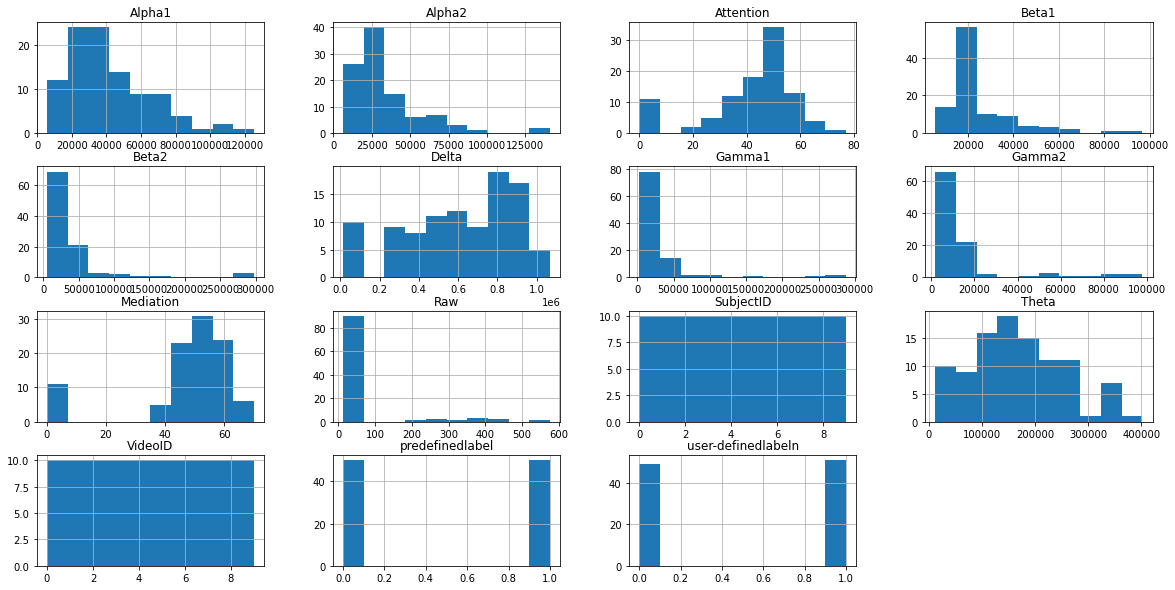

In [8]:
plt.rcParams["figure.figsize"] = (20,10)
df.hist()

    SubjectID  VideoID  Attention  Mediation         Raw          Delta  \
60          6        0        0.0        0.0  367.642857  807545.850000   
63          6        3        0.0        0.0  355.336207  855490.258621   

            Theta         Alpha1         Alpha2         Beta1          Beta2  \
60  401609.450000  112919.500000  141040.735714  81007.964286  112267.421429   
63  342884.922414  125175.672414  131039.500000  96779.896552  130072.508621   

          Gamma1        Gamma2  predefinedlabel  user-definedlabeln  
60  73135.285714  79095.264286                0                   1  
63  92971.060345  88753.534483                0                   1  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013458611400>,
      dtype=object)

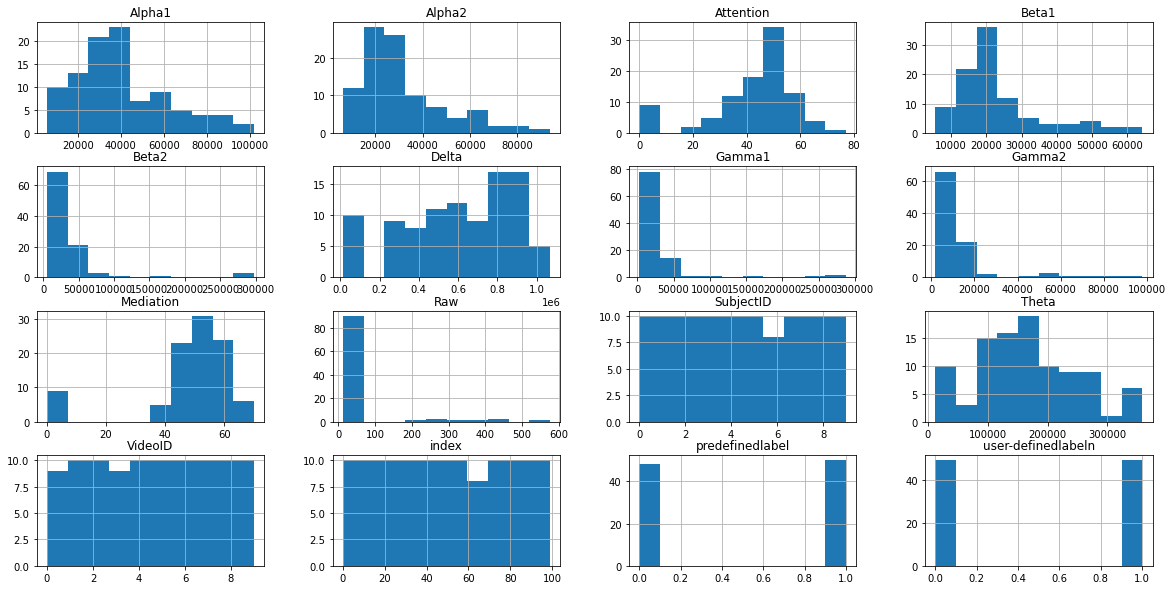

In [9]:
#remove Beta1 outliers
print(df[df["Beta1"]>70000])
new_df = df.drop([df.index[60], df.index[63]]) 
new_df.reset_index(inplace=True) 
new_df.hist()

    index  SubjectID  VideoID  Attention  Mediation         Raw  \
60     61          6        1        0.0        0.0  245.119718   
61     62          6        2        0.0        0.0  263.959016   
62     64          6        4        0.0        0.0  199.187500   

            Delta          Theta        Alpha1        Alpha2         Beta1  \
60  595207.845070  231366.323944  41717.626761  46124.112676  48270.035211   
61  584569.704918  225168.729508  38174.024590  39712.155738  47837.540984   
62  733256.729167  255086.090278  55608.263889  51380.472222  56770.826389   

            Beta2         Gamma1        Gamma2  predefinedlabel  \
60  275703.880282  287988.795775  76448.253521                0   
61  276137.368852  241545.213115  82950.344262                0   
62  297833.263889  283081.881944  97845.972222                0   

    user-definedlabeln  
60                   0  
61                   0  
62                   1  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013459A0F7F0>,
      dtype=object)

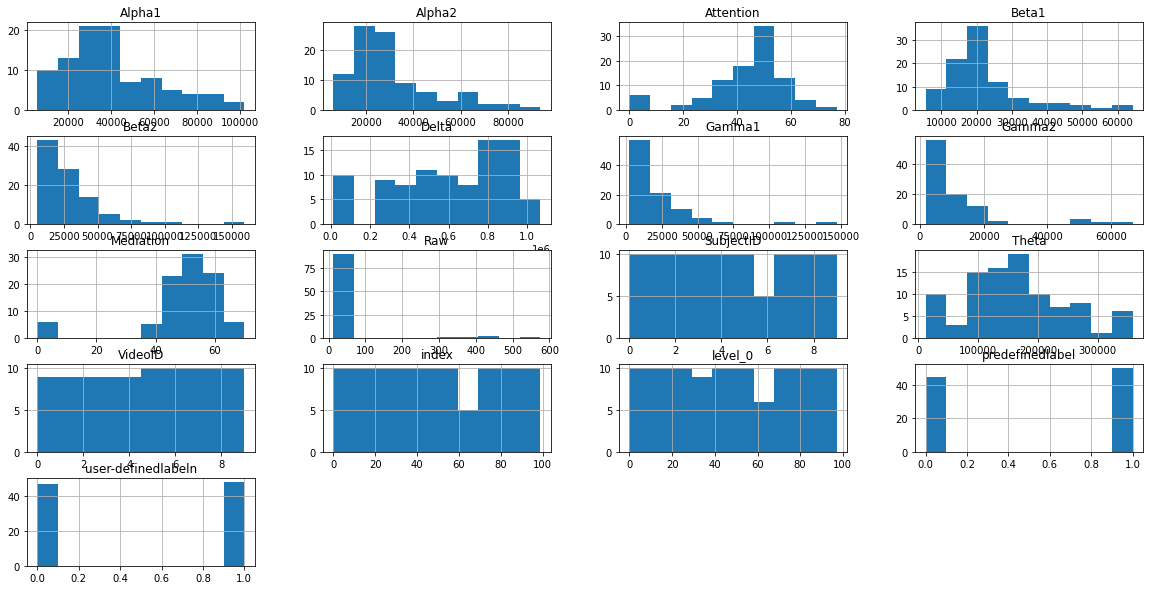

In [10]:
#remove Gamma1 outliers
print(new_df[new_df["Gamma1"]>200000])
new_df.drop([new_df.index[60], new_df.index[61], new_df.index[62]], inplace= True) 
new_df.reset_index(inplace=True)
new_df.hist()

In [11]:
#New Linear Regression
X=new_df.iloc[:,:-2]
new_X_scaled=scale(X)
new_y= new_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(new_X_scaled, new_y, test_size=0.2)

In [13]:
lr.fit(X_train, y_train.values)
yhatlr= lr.predict(X_test)  #predicted regression
print("Confusion Matrix\n", confusion_matrix(y_test,yhatlr))
print("Accuracy:", accuracy_score(y_test, yhatlr))

Confusion Matrix
 [[5 4]
 [2 8]]
Accuracy: 0.6842105263157895


In [14]:
Classify = Classify.fit(X_train, y_train.values)
predictclas= Classify.predict(X_test)
print("Confusion Matrix\n", confusion_matrix(y_test,predictclas))
print("Accuracy:", accuracy_score(y_test, predictclas))

Confusion Matrix
 [[5 4]
 [2 8]]
Accuracy: 0.6842105263157895


In [18]:
print(new_df[new_df["SubjectID"]==6])
new_df.drop([new_df.index[60], new_df.index[61], new_df.index[62], new_df.index[63], new_df.index[64], new_df.index[65],
            new_df.index[66],new_df.index[67],new_df.index[68],new_df.index[69]], inplace= True) 
new_df.reset_index(inplace=True)

    level_0  index  SubjectID  VideoID  Attention  Mediation         Raw  \
60       63     65          6        5        0.0        0.0  395.211382   
61       64     66          6        6        0.0        0.0  418.474138   
62       65     67          6        7        0.0        0.0  575.557522   
63       66     68          6        8        0.0        0.0  426.967213   
64       67     69          6        9        0.0        0.0  300.868613   

            Delta          Theta        Alpha1        Alpha2         Beta1  \
60  675630.024390  171916.975610  44623.520325  67194.674797  49157.894309   
61  793951.129310  247062.775862  42978.517241  75027.982759  61951.905172   
62  755965.451327  172671.761062  56392.849558  66123.716814  55284.522124   
63  879076.180328  241419.540984  83642.090164  93757.442623  64246.565574   
64  822708.664234  208945.313869  67313.576642  77372.233577  51915.080292   

            Beta2         Gamma1        Gamma2  predefinedlabel  \
60  104

ValueError: cannot insert level_0, already exists

In [56]:
#New Linear Regression after dropping subject 6 
X=new_df.iloc[:,:-2]
new_X_scaled=scale(X)
new_y= new_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(new_X_scaled, new_y, test_size=0.2)

In [57]:
lr.fit(X_train, y_train.values)
yhatlr= lr.predict(X_test)  #predicted regression
print("Confusion Matrix\n", confusion_matrix(y_test,yhatlr))
print("Accuracy:", accuracy_score(y_test, yhatlr))

Confusion Matrix
 [[5 4]
 [1 7]]
Accuracy: 0.7058823529411765


In [70]:
Classify = Classify.fit(X_train, y_train.values)
predictclas= Classify.predict(X_test)
print("Confusion Matrix\n", confusion_matrix(y_test,predictclas))
print("Accuracy:", accuracy_score(y_test, predictclas))

Confusion Matrix
 [[7 2]
 [0 8]]
Accuracy: 0.8823529411764706


The removal of outliers improves the accuracy of LR while lowering that of Classification, while the removal of subject 6 afterwards seems to improve accuracy of both LR and Classification 